In [6]:
import pandas as pd
import numpy as np
# from seaborn import apionly as sns
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

In [7]:
lead_time_1 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_1/weights_08031256.csv", index_col = 0)
lead_time_2 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_21021550.csv", index_col = 0)
lead_time_3 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_3/weights_09031047.csv", index_col = 0)

persistence_1 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_1/persistence.csv", index_col = 0)
persistence_2 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/persistence.csv", index_col = 0)
persistence_3 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_3/persistence.csv", index_col = 0)


In [8]:
print(lead_time_1['NIIEE_2'].mean())
print(lead_time_2['NIIEE_2'].mean())

21.586219778905292
28.194607339350515


In [9]:
NIIEEs = [lead_time_1['NIIEE_2'].mean(), lead_time_2['NIIEE_2'].mean(), lead_time_3['NIIEE_2'].mean()]
Pers = [persistence_1['NIIEE_2'].mean(), persistence_2['NIIEE_2'].mean(), persistence_3['NIIEE_2'].mean()]


tick_labels = ['1', '2', '3']

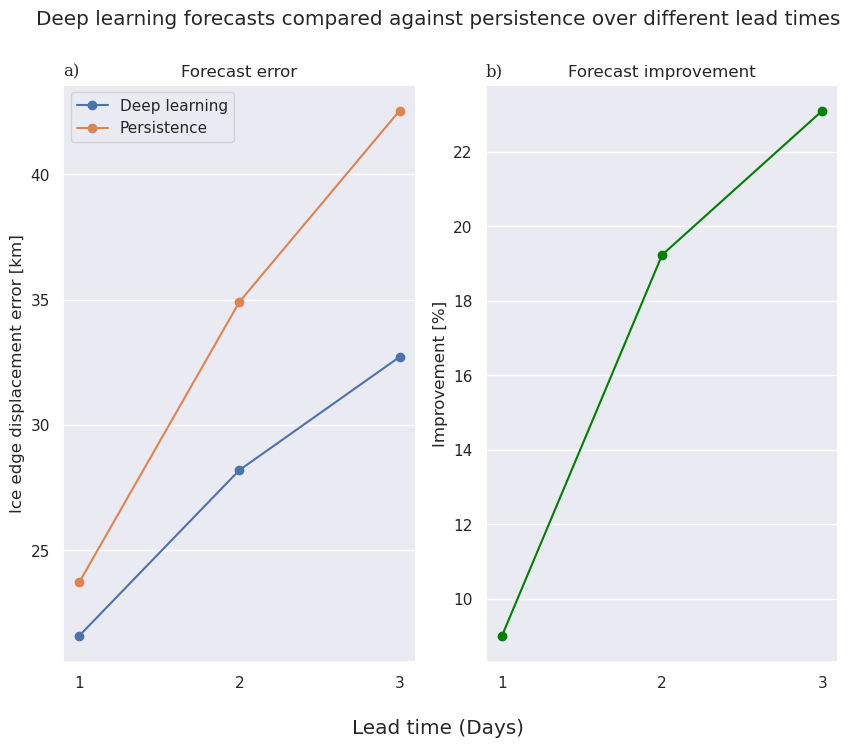

In [23]:
sns.set_theme()
matplotlib.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 2, figsize = (10, 7.5))
ax[0].plot(NIIEEs, '-o', label = 'Deep learning')
ax[0].plot(Pers, '-o', label = 'Persistence')
ax[0].grid()

ax[0].set_xticks(np.arange(3), tick_labels)
ax[0].set_title('Forecast error')
ax[0].set_ylabel('Ice edge displacement error [km]')
# ax[0].set_xlabel('Lead time (Days)')


ax[1].plot(100 * ((np.array(Pers) - np.array(NIIEEs)) / np.array(Pers)), '-o', color='green')
ax[1].set_title('Forecast improvement')
ax[1].set_ylabel('Improvement [%]')
ax[1].grid()
ax[1].set_xticks(np.arange(3), tick_labels)

ax[0].legend()
ax[0].grid(axis = 'y')
ax[1].grid(axis = 'y')

ax[0].set_title("a)", fontfamily='serif', loc='left', fontsize='medium')
ax[1].set_title("b)", fontfamily='serif', loc='left', fontsize='medium')


fig.suptitle('Deep learning forecasts compared against persistence over different lead times')
fig.supxlabel('Lead time (Days)')
plt.savefig('/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/Forecasts/lead_times.pdf', dpi=300)